
# Topic: Soft Sensing via PLS using PDS_PLS module

#### For illustration, we will use data collected from a pulp paper mill and is available at https://openmv.net. 
#### Full details on the process is available in our book 'Machine Learning for Process Systems Engineering' (https://leanpub.com/machineLearningPSE)

#### The dataset contains 301 hourly samples of 21 process variables from a Kamyr digester. Kappa number is the critical quality variable in this process, and it quantifies the lignin content in the pulp. A PLS-based inferential model is built using the PDStoolkit package.

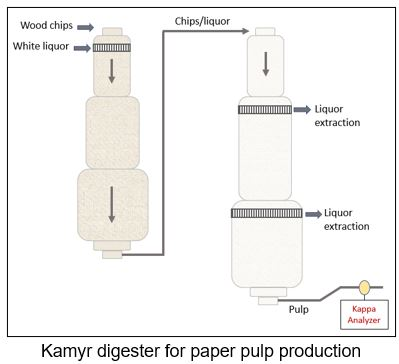

In [3]:
# import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PDStoolkit import PDS_PLS

In [6]:
# fetch data and pre-process
data = pd.read_csv('kamyr-digester.csv', usecols = range(1,23))        

# find the # of nan entries in each column
na_counts = data.isna().sum(axis = 0) 

# remove columns that have a lot of nan entries
data_cleaned = data.drop(columns = ['AAWhiteSt-4 ','SulphidityL-4 ']) 

# remove any row that have any nan entry
data_cleaned = data_cleaned.dropna(axis = 0) 

# separate X, y
y = data_cleaned.iloc[:,0].values[:,np.newaxis] # StandardScaler requires 2D array
X = data_cleaned.iloc[:,1:].values

print('Number of samples left: ', X.shape[0])

Number of samples left:  263


In [7]:
##%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
##                          Train the soft-sensing model
## %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

In [9]:
# separate train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler()
X_train_normal = X_scaler.fit_transform(X_train)
X_test_normal = X_scaler.transform(X_test)

y_scaler = StandardScaler()
y_train_normal = y_scaler.fit_transform(y_train)
y_test_normal = y_scaler.transform(y_test)

# of latents selected:  13


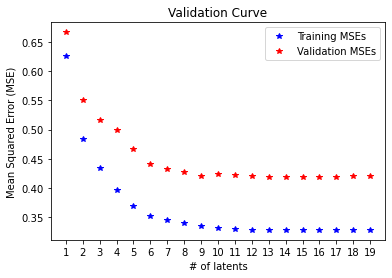

PDS_PLS(n_components=13)

In [10]:
# build PDS_PLS model
pls = PDS_PLS()
pls.fit(X_train_normal, y_train_normal, autoFindNLatents=True)

In [11]:
# check training vs test accuracy
y_train_normal_predict = pls.predict(X_train_normal)
y_test_normal_predict = pls.predict(X_test_normal)

print('Accuracy over training data: ', pls.score(X_train_normal, y_train_normal))
print('Accuracy over test data: ', pls.score(X_test_normal, y_test_normal))

Accuracy over training data:  0.6677140498380731
Accuracy over test data:  0.6872961417466836


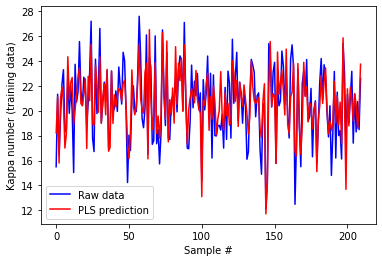

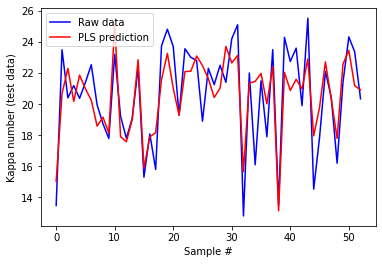

In [13]:
# plots of raw and predicted data
y_train_predict = y_scaler.inverse_transform(y_train_normal_predict)
y_test_predict = y_scaler.inverse_transform(y_test_normal_predict)

plt.figure()
plt.plot(y_train, 'b',  label = 'Raw data')
plt.plot(y_train_predict, 'r', label = 'PLS prediction')
plt.ylabel('Kappa number (training data)')
plt.xlabel('Sample #')
plt.legend()

plt.figure()
plt.plot(y_test, 'b',  label = 'Raw data')
plt.plot(y_test_predict, 'r',  label = 'PLS prediction')
plt.ylabel('Kappa number (test data)')
plt.xlabel('Sample #')
plt.legend()
plt.show()